# NYC Yellow Taxi Fare Analysis

This notebook analyzes New York City Yellow Taxi data (January 2020) to explore how different factors like payment type, trip distance, and passenger count affect taxi fares.
The analysis includes data cleaning, visualization, and hypothesis testing to compare fare amounts between card and cash payments.

# Imports
 We start by importing all the essential Python libraries for data analysis, visualization, and hypothesis testing.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings 
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("yellow_tripdata_2020-01.csv")

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [9]:
df.shape

(6405008, 18)

In [11]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

# Datetime Conversion

Converting pickup and dropoff timestamps to datetime format for time-based calculations.

In [13]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

# Trip Duration Calculation

Calculating the trip duration in minutes from pickup and dropoff times.

In [14]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

# Selecting just related data

Keeping only the required columns for analysis passenger count, payment type, fare amount, trip distance, and duration.

In [17]:
df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


# Removing Missing and Duplicate Records

Dropping rows with null values and removing duplicate entries to ensure clean data.

In [19]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [21]:
65441/len(df)*100

1.021716132126611

In [25]:
df.dropna(inplace = True)

In [31]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [33]:
df[(df.duplicated)]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [35]:
df.drop_duplicates(inplace = True)

In [37]:
print(df['passenger_count'].value_counts(normalize = True))
print(df['payment_type'].value_counts(normalize = True))

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64
payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64


In [39]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count']>0) & (df['passenger_count']<6)]
df.shape

(2780283, 5)

In [41]:
df['payment_type'].replace([1, 2], ['card', 'cash'], inplace = True)

In [43]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


# Removing Invalid and Outlier Values

Filtering out negative or zero values and removing extreme outliers using the IQR method.

In [45]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

In [47]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr


    df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [49]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.383333
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000


# Distribution Visualization

Comparing fare amount and trip distance distributions across card and cash payments.

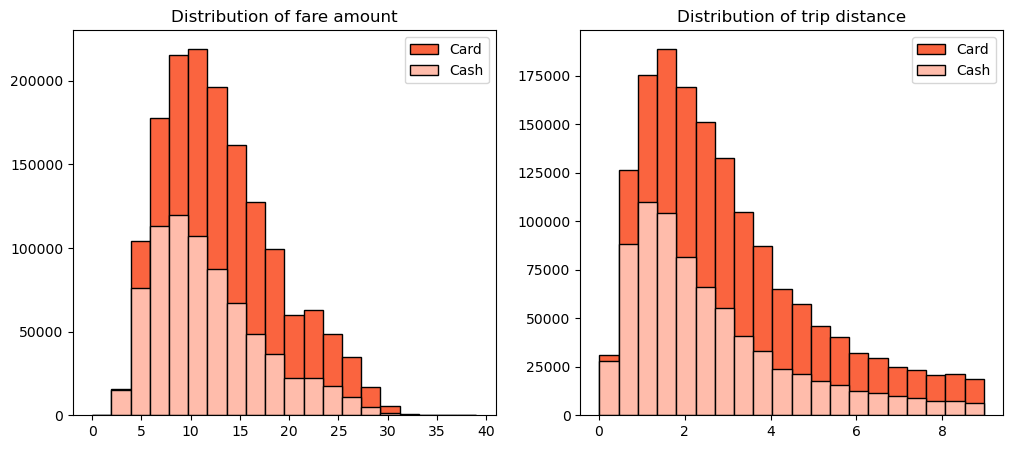

In [51]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title("Distribution of fare amount")
plt.hist(df[df['payment_type']=='card']['fare_amount'], histtype= 'barstacked',bins = 20, edgecolor = 'k', color = "#FA643F", label = 'Card')
plt.hist(df[df['payment_type']=='cash']['fare_amount'], histtype= 'barstacked',bins = 20, edgecolor = 'k', color = "#FFBCAB", label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title("Distribution of trip distance")
plt.hist(df[df['payment_type']=='card']['trip_distance'], histtype= 'barstacked',bins = 20, edgecolor = 'k', color = "#FA643F", label = 'Card')
plt.hist(df[df['payment_type']=='cash']['trip_distance'], histtype= 'barstacked',bins = 20, edgecolor = 'k', color = "#FFBCAB", label = 'Cash')
plt.legend()
plt.show()

In [53]:
df.groupby("payment_type").agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
card           13.112493  5.849281      2.992237  1.99274
cash           11.758005  5.613038      2.602207  1.91372

# Payment Type Preference

Visualizing overall preference for card vs. cash payments using a pie chart.

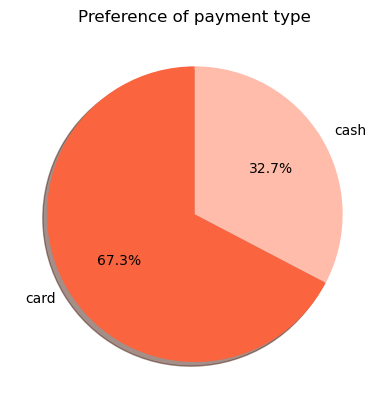

In [55]:
plt.title("Preference of payment type")
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
        startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['#FA643F', '#FFBCAB'])
plt.show()

# Passenger Count Analysis

Calculating passenger count distribution for each payment type and deriving percentages.

In [57]:
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count': 'count'}, inplace=True)
passenger_count = passenger_count.reset_index()


In [59]:
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100

In [61]:
passenger_count

,payment_type,passenger_count,count,perc
0,card,1,909245,39.568381
1,card,2,327661,14.259100
2,card,3,122412,5.327106
3,card,4,63676,2.771042
4,card,5,124045,5.398171
5,cash,1,460550,20.042143
6,cash,2,155472,6.765806
7,cash,3,54506,2.371984
8,cash,4,32715,1.423686
9,cash,5,47626,2.072581


# Stacked Bar Visualization

Creating a stacked horizontal bar chart to visualize passenger count distribution by payment type.

In [65]:
pivot_df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
pivot_df['payment_type'] = ['card', 'cash']
pivot_df.iloc[0, 1:] = passenger_count.iloc[0:5,-1]
pivot_df.iloc[1, 1:] = passenger_count.iloc[5:, -1]
pivot_df

,payment_type,1,2,3,4,5
0,card,39.568381,14.2591,5.327106,2.771042,5.398171
1,cash,20.042143,6.765806,2.371984,1.423686,2.072581


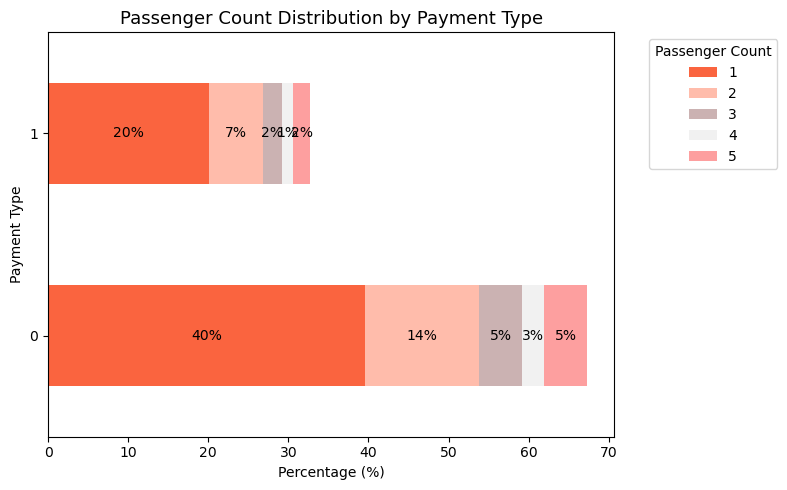

In [67]:
ax = pivot_df.plot(
    kind='barh',
    stacked=True,
    color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'],
    figsize=(8,5)
)

# --- Step 4: Add percentage labels ---
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        x, y = p.get_xy()
        ax.text(
            x + width/2,
            y + p.get_height()/2,
            f'{width:.0f}%',
            ha='center',
            va='center',
            fontsize=10,
            color='black'
        )

# --- Step 5: Titles and labels ---
plt.title('Passenger Count Distribution by Payment Type', fontsize=13)
plt.xlabel('Percentage (%)')
plt.ylabel('Payment Type')
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Hypothesis Testing: Fare Amount

Performing a two-sample t-test to check if there is a significant difference in average fare amount between card and cash payments.

In [66]:
pivot_df

,payment_type,1,2,3,4,5
0,card,1,2,3,4,5
1,cash,20.042143,6.765806,2.371984,1.423686,2.072581


In [68]:
card_sample = df[df['payment_type']=='card']['fare_amount']
cash_sample = df[df['payment_type']=='cash']['fare_amount']

In [70]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print("P tastistic", t_stats, "P Value", p_value)

P tastistic 169.2111527245052 P Value 0.0


# Hypothesis Test Interpretation

We performed a two-sample independent t-test to compare the average fare amounts between card and cash payments.
* Null Hypothesis (H₀): There is no significant difference in the mean fare amount between card and cash payments.
* Alternative Hypothesis (H₁): There is a significant difference in the mean fare amount between card and cash payments.

The test results are as follows:

* t-statistic: 169.21
* p-value: 0.0

Since the p-value (0.0) < 0.05, we reject the null hypothesis.
This indicates that the average fare amount for card payments is significantly different from that for cash payments.
In other words, payment type has a statistically significant impact on fare amount in this dataset.